In [42]:
from __future__ import print_function
import pandas as pd

filepath = ('loan.csv')

data = pd.read_csv(filepath)

print(data.shape)
data.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [43]:

data = data.dropna(subset=['Loan_Status'])
y_col = 'Loan_Status'

X = data.drop(y_col, axis=1)
y = data[y_col]


In [44]:
# Fill numerical missing values with median
num_cols = X.select_dtypes(include=['int64','float64']).columns
X[num_cols] = X[num_cols].fillna(X[num_cols].median())

# Fill categorical missing values with mode
cat_cols = X.select_dtypes(include=['object']).columns
X[cat_cols] = X[cat_cols].fillna(X[cat_cols].mode().iloc[0])


In [45]:
# One-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Encode target variable (Y/N → 1/0)
y = y.map({'Y': 1, 'N': 0})

print("Encoded data shape:", X_encoded.shape)


Encoded data shape: (614, 627)


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42
)


In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(
    n_neighbors=5,
    weights='distance'
)

knn.fit(X_train_scaled, y_train)



,n_neighbors,5
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [49]:
y_test_pred = knn.predict(X_test_scaled)


In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_test_pred))



Accuracy: 0.7405405405405405


In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

score_list = []

for k in range(1, 21):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    y_pred = knn.predict(X_test_scaled)
    score = accuracy_score(y_test, y_pred)
    
    score_list.append((k, score))

score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])
score_df


,k,accuracy
0,1,0.729730
1,2,0.670270
2,3,0.751351
3,4,0.724324
4,5,0.740541
5,6,0.691892
6,7,0.729730
7,8,0.702703
8,9,0.729730
9,10,0.718919


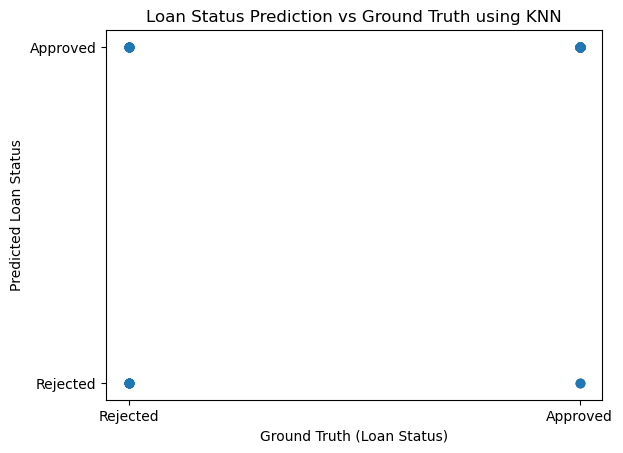

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

ax = plt.axes()
ax.scatter(y_test, y_test_pred, alpha=0.5)

ax.set(
    xlabel='Ground Truth (Loan Status)',
    ylabel='Predicted Loan Status',
    title='Loan Status Prediction vs Ground Truth using KNN'
)

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Rejected', 'Approved'])
ax.set_yticklabels(['Rejected', 'Approved'])

plt.show()
